In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
df = pd.read_csv('./final_distribution.dat', sep='\t')



# Inicializar una lista para almacenar las secciones
secciones = []

# Inicializar una lista vacía para almacenar temporalmente las filas de una sección
seccion_temp = []

# Iterar a través de las filas del DataFrame
for index, row in df.iterrows():
    # Si la primera columna de la fila contiene la palabra "endl", significa que comenzamos una nueva sección
    if row.iloc[0] == "endl":
        # Añadir la sección temporal a la lista de secciones
        if len(seccion_temp) > 0:
            secciones.append(seccion_temp)
        # Reiniciar la lista temporal para la nueva sección
        seccion_temp = []
    else:
        # Agregar la fila a la sección temporal
        seccion_temp.append(row)

# Añadir la última sección a la lista de secciones si no está vacía
if len(seccion_temp) > 0:
    secciones.append(seccion_temp)

# Ahora, 'secciones' contendrá una lista de DataFrames, cada uno representando una sección del CSV
for i, seccion in enumerate(secciones):
    print(f"Sección {i + 1}:")
    if len(seccion) > 0:
        seccion_df = pd.DataFrame(seccion)
        print(seccion_df)
    else:
        print("Sección vacía")

Sección 1:
   column  count
0       1    5.0
1       2    3.0
2       3   24.0
3       4   25.0
4       5   48.0
5       6   66.0
6       7   81.0
7       8   72.0
8       9   65.0
9      10   60.0
10     11   28.0
11     12   13.0
12     13   10.0
Sección 2:
   column  count
14      1    4.0
15      2    6.0
16      3   15.0
17      4   40.0
18      5   69.0
19      6   69.0
20      7   79.0
21      8   68.0
22      9   64.0
23     10   49.0
24     11   27.0
25     12    6.0
26     13    4.0
Sección 3:
   column  count
28      1    8.0
29      2    6.0
30      3   17.0
31      4   31.0
32      5   52.0
33      6   89.0
34      7   84.0
35      8   67.0
36      9   73.0
37     10   39.0
38     11   19.0
39     12    6.0
40     13    9.0
Sección 4:
   column  count
42      1    4.0
43      2    5.0
44      3   15.0
45      4   41.0
46      5   73.0
47      6   72.0
48      7   72.0
49      8   80.0
50      9   64.0
51     10   40.0
52     11   21.0
53     12    8.0
54     13    5.0
Secc

2
    column  mean
0        1   4.5
1        2   5.1
2        3  16.7
3        4  34.3
4        5  61.9
5        6  75.9
6        7  76.3
7        8  71.2
8        9  66.6
9       10  49.1
10      11  25.4
11      12   6.8
12      13   6.4


C:\Users\nicho\AppData\Local\Temp\ipykernel_11112\1726875561.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mean_data['mean'][i] /= 10


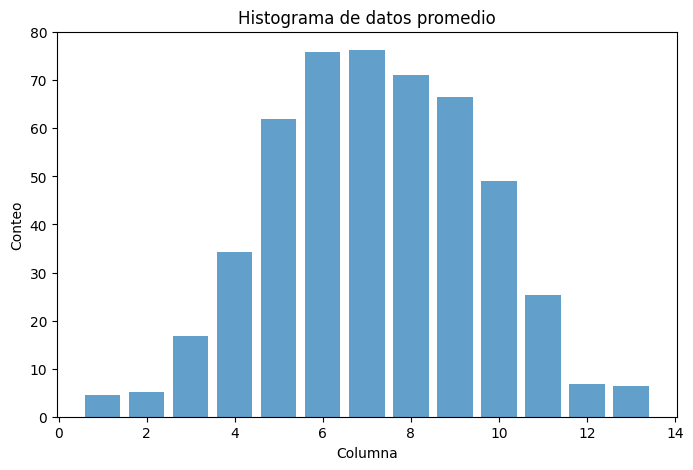

In [106]:
mean_data = pd.DataFrame(columns=['column', 'mean'])
number_of_columns = len(pd.DataFrame(seccion)['column'])

for i in range(number_of_columns):
    mean_data.loc[i] = [i + 1, 0]
mean_data['mean'][1] += 2
print(mean_data['mean'][1])

for i, seccion in enumerate(secciones):
    seccion_df = pd.DataFrame(seccion)
    seccion_df = seccion_df.reset_index(drop=True)

    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(8)

    plt.bar(seccion_df['column'], seccion_df['count'], align='center', alpha=0.7)
    plt.xlabel('Columna')
    plt.ylabel('Conteo')
    plt.title(f'Histograma de datos {i + 1}')

    nombre_archivo = f'histograma_seccion_{i + 1}.png'
    plt.savefig(nombre_archivo)
    plt.close()

    for j in range(number_of_columns):
        mean_data['mean'][j] += seccion_df['count'][j]

for i in range(number_of_columns):
    mean_data['mean'][i] /= 10

print(mean_data)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(8)

plt.bar(mean_data['column'], mean_data['mean'], align='center', alpha=0.7)
plt.xlabel('Columna')
plt.ylabel('Conteo')
plt.title(f'Histograma de datos promedio')

nombre_archivo = f'histograma_promedio.png'
plt.savefig(nombre_archivo)